--- Step 1: Loading Processed Data ---
Data loading complete. Took 0.01 seconds.
Shape of X_train_pca: (21600, 50)
Shape of X_test_pca: (5400, 50)
------------------------------

--- Step 2: Training Scikit-learn Models ---
Training Logistic Regression...


e:\GITAM SEMESTERS\5th-sem\MLA - CSEN3261\ML_TERM-PROJECT\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed in 7.09 seconds. F1-Score: 0.6308
Training Support Vector Machine...
Completed in 10.10 seconds. F1-Score: 0.7727
Training Random Forest...
Completed in 18.99 seconds. F1-Score: 0.7939
Training Gradient Boosting...
Completed in 774.26 seconds. F1-Score: 0.7595
------------------------------

--- Step 3: Training Neural Network (MLP) ---


e:\GITAM SEMESTERS\5th-sem\MLA - CSEN3261\ML_TERM-PROJECT\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,242 (184.54 KB)

 Trainable params: 47,242 (184.54 KB)

 Non-trainable params: 0 (0.00 B)

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
Completed in 16.12 seconds. F1-Score: 0.2409
------------------------------

--- Step 4: Final Model Comparison & Saving ---
Model Performance Comparison:
                        Accuracy  F1-Score
Random Forest           0.799444  0.793855
Support Vector Machine  0.775926  0.772716
Gradient Boosting       0.762593  0.759497
Logistic Regression     0.641481  0.630842
Neural Network (MLP)    0.322593  0.240924

Performance summary saved to '../results\model_performance.csv'


Confusion matrix saved to '../results\confusion_matrix.png'

Saving all trained models...
Saved 'Logistic Regression' to '../models\logistic_regression.joblib'
Saved 'Support Vector Machine' to '../models\support_vector_machine.joblib'
Saved 'Random Forest' to '../models\random_forest.joblib'
Saved 'Gradient Boosting' to '../models\gradient_boosting.joblib'
Saved 'Neural Network (MLP)' to '../models\neural_network_mlp.h5'

Model training and saving complete!


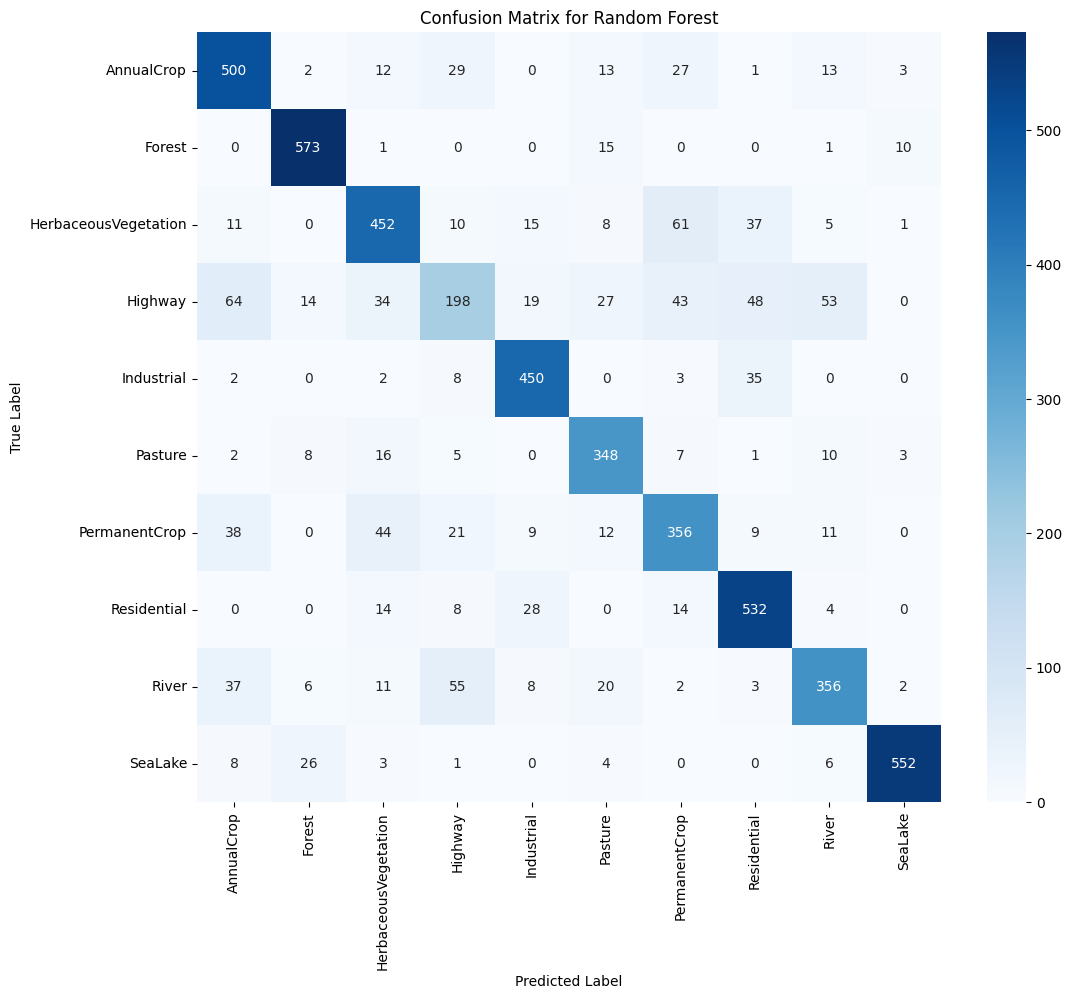

In [1]:
# --- 1. Load Processed Data ---
import numpy as np
import os
import time
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Load the data saved from the first notebook ---
print("--- Step 1: Loading Processed Data ---")
start_time = time.time()

# Define paths relative to the current notebook's location in the 'notebooks' folder
results_path = '../results'
models_path = '../models'

# Ensure the models directory exists
os.makedirs(models_path, exist_ok=True)

X_train_pca = np.load(os.path.join(results_path, 'X_train_pca.npy'))
X_test_pca = np.load(os.path.join(results_path, 'X_test_pca.npy'))
y_train = np.load(os.path.join(results_path, 'y_train.npy'))
y_test = np.load(os.path.join(results_path, 'y_test.npy'))
class_names = np.load(os.path.join(results_path, 'class_names.npy'), allow_pickle=True)

print(f"Data loading complete. Took {time.time() - start_time:.2f} seconds.")
print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")
print("-" * 30)


# --- 3. Train and Evaluate Scikit-learn Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("\n--- Step 2: Training Scikit-learn Models ---")

# Define the models to train
models_to_train = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}
trained_models = {}

for name, model in models_to_train.items():
    print(f"Training {name}...")
    start_time = time.time()
    
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[name] = {'Accuracy': accuracy, 'F1-Score': f1}
    trained_models[name] = model # Store the trained model object
    
    print(f"Completed in {time.time() - start_time:.2f} seconds. F1-Score: {f1:.4f}")

print("-" * 30)

# --- 4. Train and Evaluate the Neural Network (MLP) ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

print("\n--- Step 3: Training Neural Network (MLP) ---")
start_time = time.time()

# One-hot encode the labels for Keras
y_train_keras = to_categorical(y_train, num_classes=len(class_names))
y_test_keras = to_categorical(y_test, num_classes=len(class_names))

# Build the MLP model
mlp = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp.summary()

# Train the model
history = mlp.fit(X_train_pca, y_train_keras,
                  epochs=30,
                  batch_size=128,
                  validation_split=0.2,
                  verbose=0) # Set to 0 to keep output clean

# Evaluate the model
y_pred_probs = mlp.predict(X_test_pca)
y_pred_mlp = np.argmax(y_pred_probs, axis=1)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

results["Neural Network (MLP)"] = {'Accuracy': accuracy_mlp, 'F1-Score': f1_mlp}
trained_models["Neural Network (MLP)"] = mlp # Store the trained MLP

print(f"Completed in {time.time() - start_time:.2f} seconds. F1-Score: {f1_mlp:.4f}")
print("-" * 30)


# --- 5. Display Final Results and Save ALL Models ---
print("\n--- Step 4: Final Model Comparison & Saving ---")

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df.sort_values(by='F1-Score', ascending=False))

# Save the results to a CSV file
results_df.to_csv(os.path.join(results_path, 'model_performance.csv'))
print(f"\nPerformance summary saved to '{os.path.join(results_path, 'model_performance.csv')}'")

# Generate and save the confusion matrix for the best scikit-learn model
best_sklearn_model_name = results_df.drop('Neural Network (MLP)', errors='ignore').idxmax()['F1-Score']
best_sklearn_model = trained_models[best_sklearn_model_name]
y_pred_best = best_sklearn_model.predict(X_test_pca)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix for {best_sklearn_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
confusion_matrix_path = os.path.join(results_path, 'confusion_matrix.png')
plt.savefig(confusion_matrix_path)
print(f"Confusion matrix saved to '{confusion_matrix_path}'")


# --- Save ALL trained models ---
print("\nSaving all trained models...")

for name, model in trained_models.items():
    # Sanitize the name for use as a filename
    filename_name = name.lower().replace(' ', '_').replace('(', '').replace(')', '')
    
    if isinstance(model, tf.keras.Model):
        # Save Keras models in .h5 format
        model_path = os.path.join(models_path, f"{filename_name}.h5")
        model.save(model_path)
    else:
        # Save scikit-learn models using joblib
        model_path = os.path.join(models_path, f"{filename_name}.joblib")
        joblib.dump(model, model_path)
        
    print(f"Saved '{name}' to '{model_path}'")

print("\nModel training and saving complete!")

